In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index=pd.read_csv("DataSets/economic_index.csv")

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
#Drop unwanted columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
#Check NULL values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

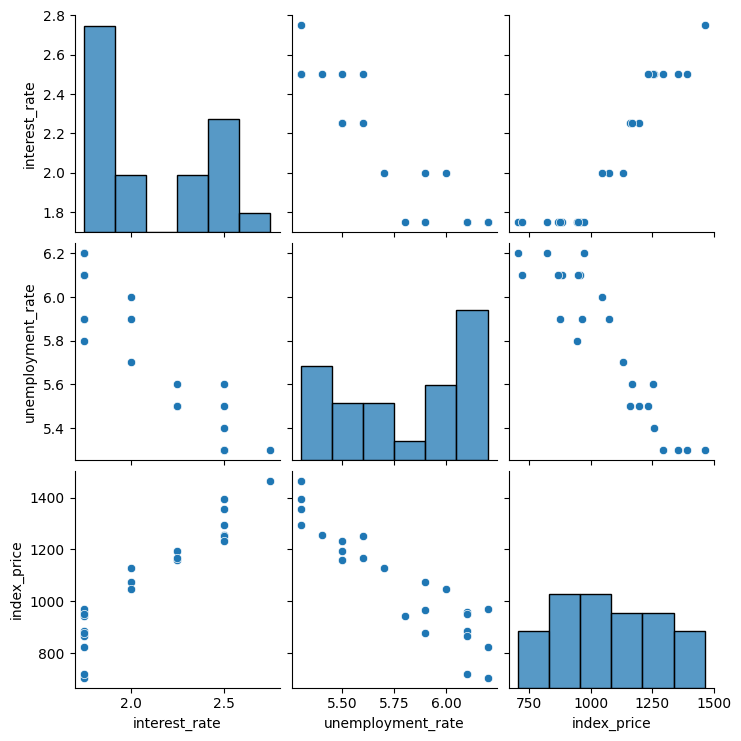

In [8]:
#Lets do some data visualization
import seaborn as sns
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


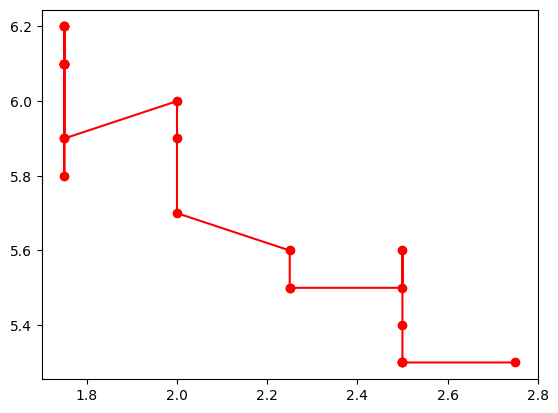

In [16]:
#Visualize datapoints more closely
plt.plot(df_index['interest_rate'],df_index['unemployment_rate'],color='r',marker='o')

In [17]:
#independent and dependant features
x=df_index.iloc[:,:-1] #All exceot last columns
y=df_index.iloc[:,-1] #Last Column

In [20]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

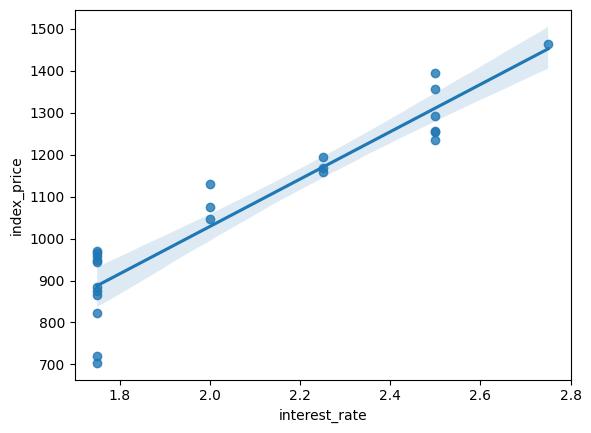

In [31]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

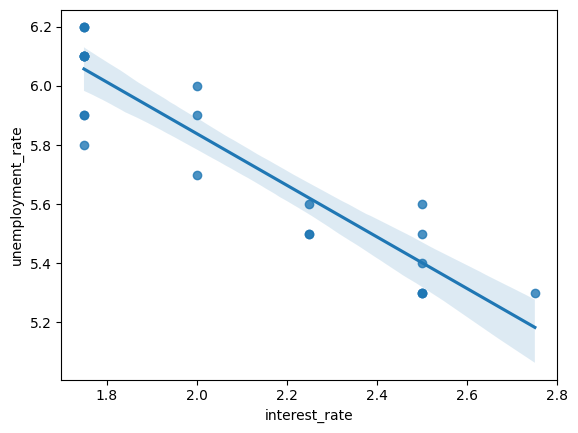

In [29]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

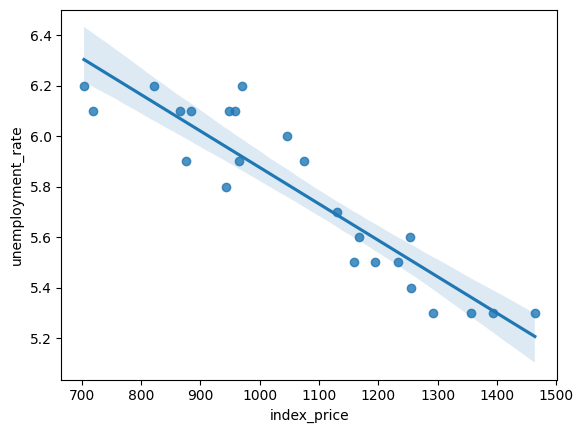

In [32]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

In [33]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [36]:
#Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [37]:
regression=LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [38]:
'''
Evaluate a score by cross-validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
https://scikit-learn.org/stable/modules/model_evaluation.html
'''

from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [40]:
np.mean(validation_score)

np.float64(-5914.828180162392)

In [41]:
#prediction
#Prediction for test data
y_pred=regression.predict(x_test)

In [42]:
#Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [43]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
R2Scr=r2_score(y_test,y_pred)
print("mean_squared_error:",mse)
print("mean_absolute_error:",mae)
print("Root Mean Squared Error:",rmse)
print("R2Square:",R2Scr)
'''Adjusted R Square
1 - [(1 - R2)(n - 1) / (n - p - 1)]
'''
Adj_R2Scr = 1 - (1 - R2Scr) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
print("Adjusted R Square:",Adj_R2Scr)

mean_squared_error: 8108.567426306611
mean_absolute_error: 73.80444932337099
Root Mean Squared Error: 90.04758423359624
R2Square: 0.7591371539010254
Adjusted R Square: 0.5985619231683756


Assumptions

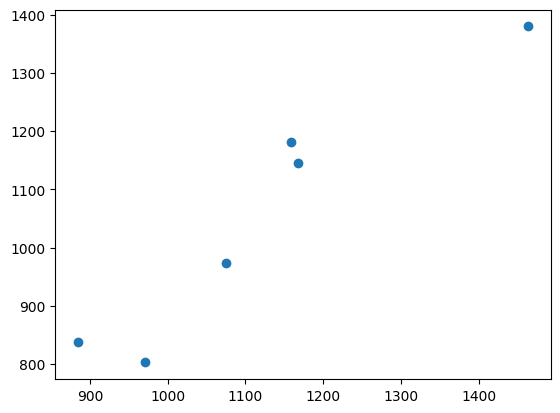

In [45]:
#If there is a linear relationship, that basically means your model has performed well.
plt.scatter(y_test,y_pred)


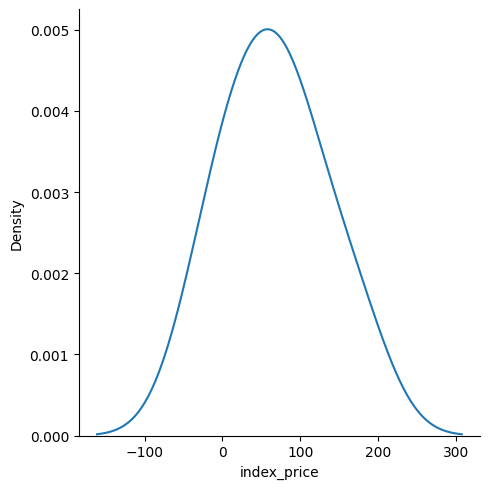

In [47]:
#Plot the residuals, if the plot shows normal distribution, than model is good
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')

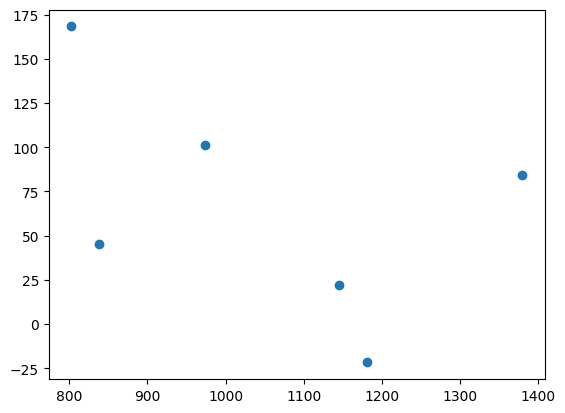

In [48]:
#Scatter plot with respect to predictions and residual
plt.scatter(y_pred,residuals)

In [49]:
##OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

prediction=model.predict(x_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 15 Aug 2024   Prob (F-statistic):                       0.754
Time:                        13:30:02   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\study\Machine-Learning-Ravz\mlenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [50]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [66]:
#Prediction for new data
pred_index=regression.predict(scaler.transform([[0.8,11]]))
print(pred_index)

[311.65248483]
